# Lab 3 - Capacitors 

In [33]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize
import seaborn as sns
import scipy.odr as odr
import matplotlib.ticker as mticker

from IPython.display import Image
from decimal import Decimal
from astropy.modeling import models, fitting
from math import pi

## Equipment
- Digital multimeter (DMM)
- Analog Discovery 2
- Laptop with WaveForms installed
- Breadboard adaptor
- Large breadboard
- Components
    - Mystery resistor and capacitor
    - Resistors: 100 Ω, 1 kΩ, 10 kΩ, 15 kΩ
    - Capacitors: 100 pF, 10nF
    - Jumper wires


## Part 1 – Time domain
Finding R and C
This game (like much of our labs) is taken from Art of Electronics. You will be given a capacitor and resistor
with the values hidden, but with letters on them so I can keep track of which is which. Make a note of the
letters on your mystery resistor and capacitor. Try to resist the urge to measure them directly with your
multimeter.

First, we will measure RC – the characteristic time of an RC circuit. Build the following circuit, using a
waveform generator for the voltage source.


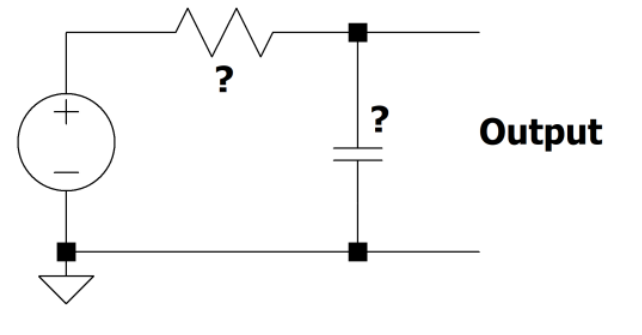

In [2]:
Image("pic1.png")

$$V_C = V_S(1-e^{\frac{-T}{RC}})$$

In [35]:
def capacitorV(V,time,RC):
    Vc = V*(1-np.exp(-time/(RC)))
    return Vc
capacitorV(3.677,94.42*10**(-6),.00001)
#RC = 10*10^(-5) or 1 micron

3.676708334452575

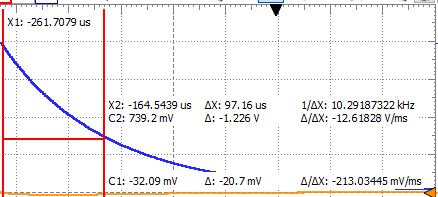

In [4]:
Image("pic6_1.png")

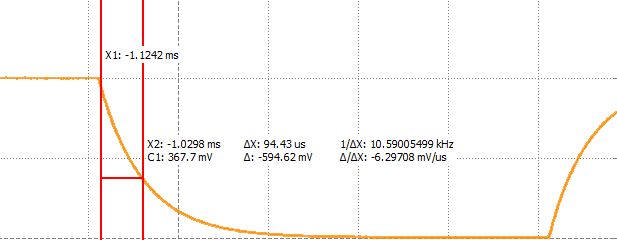

In [5]:
Image("pic6.png")

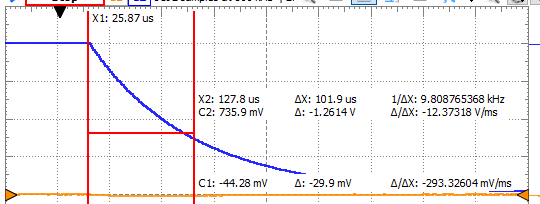

In [8]:
Image("pic6_3.png")

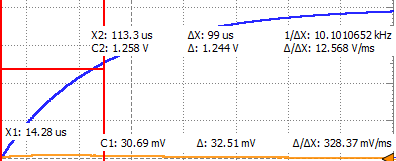

In [2]:
Image("pic7_1.png")

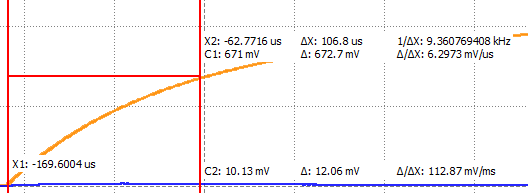

In [6]:
Image("pic7.png")

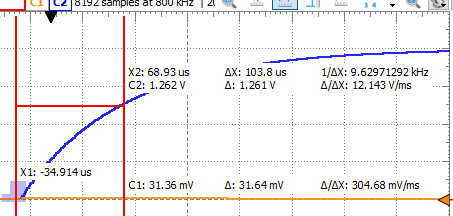

In [7]:
Image("pic7_3.png")

Drive the circuit with a square wave at 500 Hz or less and look at the output. You want to select a
frequency so you can see the capacitor fully charge. Measure the time constant by determining the time
for the output to drop to 37% $(=1/e)$.

101.9 microseconds

Measure the time to climb from fully discharged to 63% charged. Is it the same as the time to fall to 37%?

103.8 microseconds

Next, we need to disentangle R and C. You have had practice in lab and with homework problems
determining the resistance of components. Here we will do it with another method. Imagine the RC circuit
as a black box, and you do not necessarily have access to the individual components. We will create a
voltage divider and use the complex impedance of the capacitor to our advantage.

Build the setup below. The dotted box represents our “black box.” Use the two channels of the
oscilloscope to probe the input voltage, and the voltage after our known resistor1
. Both channels shouldbe referenced to ground (i.e. 1- and 2- should be connected to ground). You may find you need to change
the known resistor value. Drive the circuit with a sine wave. 

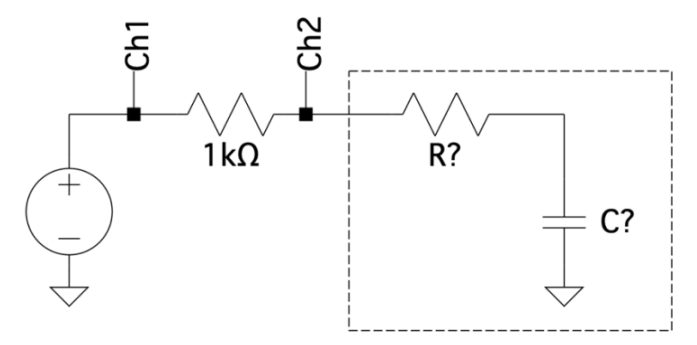

In [3]:
Image("pic2.png")

Before you try to measure R and C independently, derive the theoretical voltage at Ch2 in terms of Vin,
our known resistance, the unknown resistance, and the unknown capacitance. Hint: use the typical
voltage divider equation, but instead of resistances, use impedances for the resistors and the cap.

You should find that Vout has a phase shift relative to Vin (i.e. Vout / Vin is complex). In what limit is the
phase shift zero (i.e. Vout / Vin is real)? Probe that regime with your circuit to find R. Hint: You should not
need to go as high as 1MHz. At those frequencies the capacitance of the wires and instruments enter the
picture.

Once you have R you should be able to find C no problem. In your report make sure you note the letters
on your unknown resistor and capacitor so I can check your work.

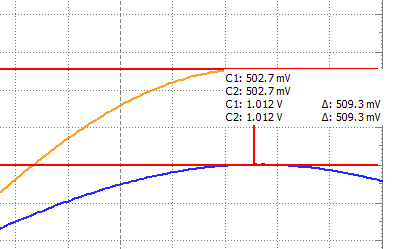

In [20]:
Image("pic9_1.png")

In [32]:
ohms = (985*.5027)/(1.012-.5027) #ohms
Farads = (101.9+103.8)/2*1e-6/ohms
print("{:.3F}".format(Decimal(ohms/1e3)),"kOhms")
print("{:.0F}".format(Decimal(Farads*1e9)),"nF")

0.972 kOhms
106 nF


## Differentiator
Build the RC differentiator shown below

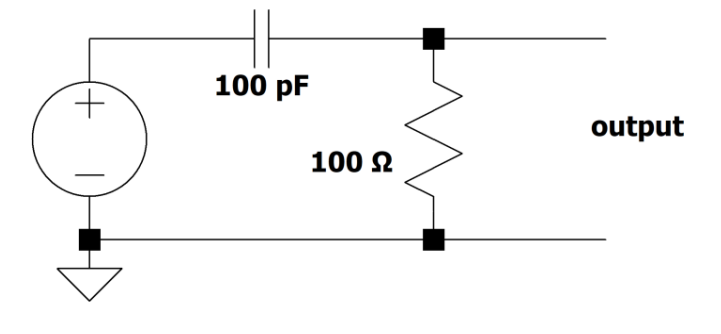

In [4]:
Image("pic3.png")

Convince yourself this circuit acts as a differentiator by exploring a few waveforms.
- Derivative of my input signal?
- High-pass filter
- can generate a square wave from a triangle wave input and produce alternating-direction voltage spikes when a square wave is applied.
- 

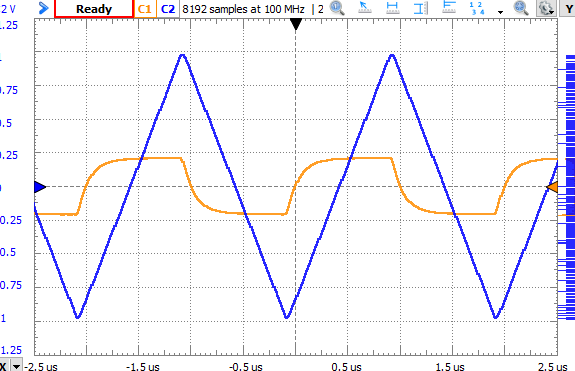

In [34]:
Image("pic10.png")

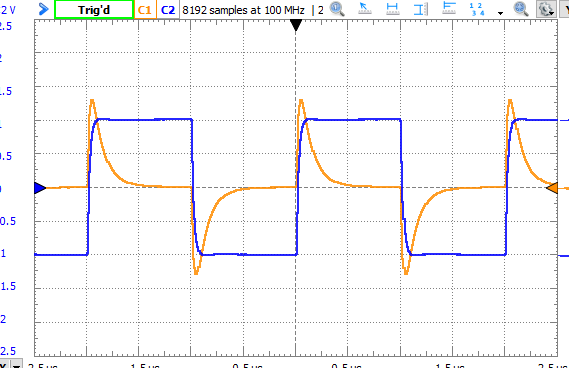

In [35]:
Image("pic11.png")

$$V_{out}= RC\frac{dV_A}{dt}$$
$$V_A = |V_{in}|sin(\omega t)$$

## Integrator
Build the RC integrator circuit below.

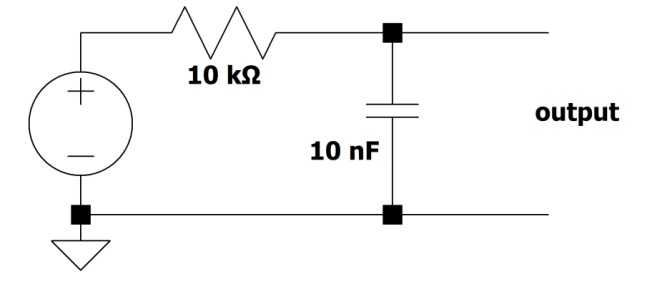

In [5]:
Image("pic4.png")

Again, drive the circuit with a variety of waveforms and convince yourself that it is performing
integration for you. If you really want to, WaveForms allows you to define arbitrary waveforms – you
can use this circuit to do your calculus homework!

Note that the integrator only works when 𝑉𝑜𝑢𝑡 ≪ 𝑉𝑖𝑛. Check that you are in this regime, especially if you
have trouble above. Give a qualitative explanation for how we are ensuring this regime. Hint: The output
is the voltage across the capacitor. Think about what happens in the very low frequency limit, and why
that might break the integrator

# Part 2 – Frequency domain
### Low-pass filter

Construct the low-pass filter shown below.


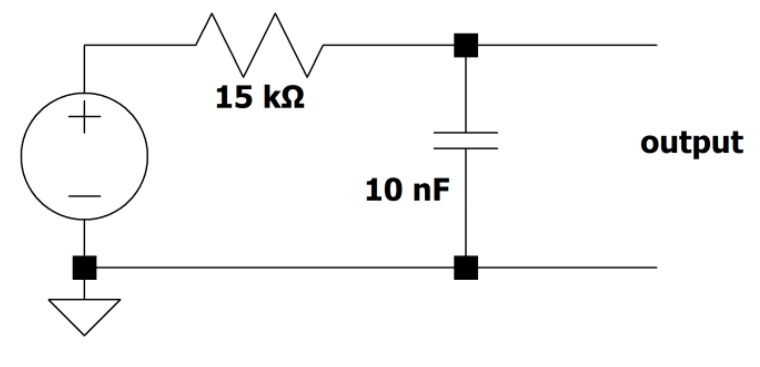

In [6]:
Image("pic5.png")

What do you expect the -3dB cutoff frequency to be? Determine the passband shape by sweeping over
a range of frequencies and recording $|\frac{𝑉_{𝑜𝑢𝑡}}{𝑉_{𝑖𝑛}}|$. Use this method to determine the -3dB cutoff
frequency.

What is the limiting phase shift, both at very high and very low frequencies?


In [163]:
10*np.log10(1/2)

R = 15e3
C = 10*10e-9

#so our voltage ratio must be 1/2


In [162]:
pi*np.sqrt(1/(4*(R**2)*(C**2)))

1047.1975511965977

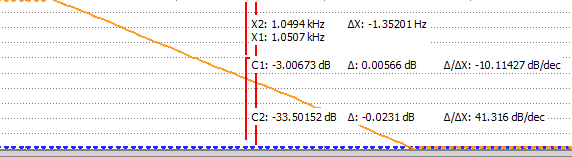

In [127]:
Image("pic14.png")

In [129]:
f = 1050
R = 15e3
C = 10*10e-9
10*np.log10(1/(1+(f)**2*(R)**2*(C)**2))

-5.416572352338342

### Smoothing a signal
Let’s use the low-pass filter to remove high frequency noise from a signal.We will use a sine wave well below our cutoff frequency as our “signal,” and add random numbers to
represent noise. Go to your waveform generator in WaveForms. In the dropdown menu that typically
has “Simple” selected, instead choose “Custom.” Then on the left, click “New.”


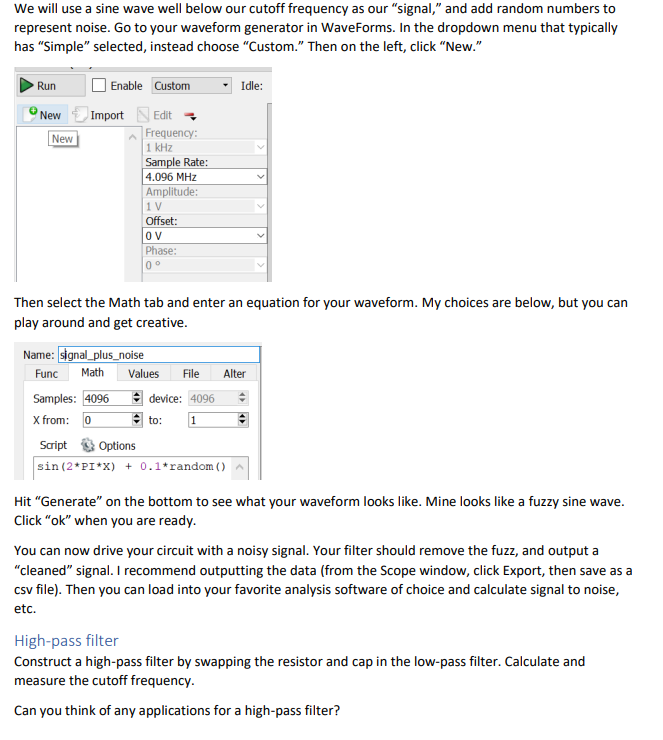

In [164]:
Image("pic15.png")

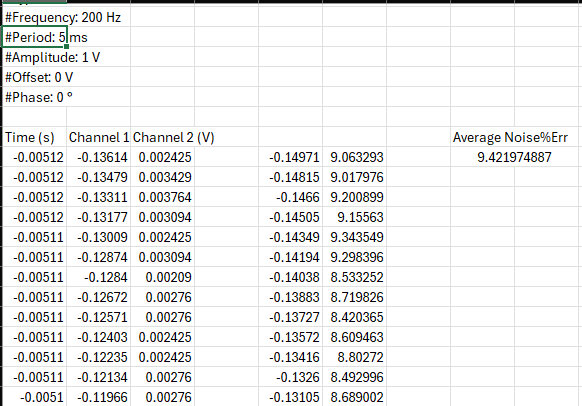

In [165]:
Image("pic16.png")

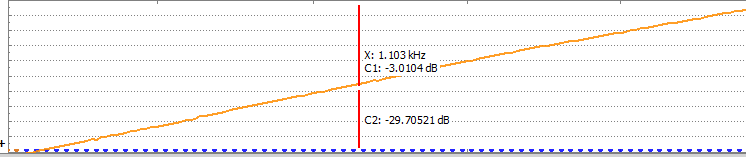

In [166]:
Image("pic17.png")

I got roughly the same with a 40 Hz difference between my high pass and low pass filter.

High pass filters can be used to filter out low frequency sounds